<a href="https://colab.research.google.com/github/game-addicted-man/2025DLP/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%8A%B5_%EB%91%90_%EB%A7%88%EB%A6%AC%EC%9D%98_%ED%86%A0%EB%81%BC_%EC%9E%A1%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 두 마리의 토끼 잡기<br>
by uramoon@kw.ac.kr (<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)<br>
하나의 인공신경망으로 MNIST와 우리가 그린 그림을 모두 잘 예측하도록 만들어봅시다.<br>
(MNIST 테스트 데이터 정확도 95% 이상 **AND** 우리가 그린 테스트 데이터 정확도 95% 이상)

자료실의 our_mnist.npz 파일을 Colab에 업로드한 후 다음을 진행합니다.<br>
our_mnist.npz 파일은 여러분이 그린 그림으로 만든 데이터셋입니다.

## 우리가 그린 그림 가져오기

In [1]:
import numpy as np

npzfile = np.load('our_mnist.npz')

our_train_images = npzfile['our_train_images']
our_train_labels = npzfile['our_train_labels']
our_test_images = npzfile['our_test_images']
our_test_labels = npzfile['our_test_labels']

## 우리가 그린 훈련 데이터 살펴보기
우리가 그린 훈련 데이터는 [0, 1]로 정규화가 필요 없음을 알 수 있습니다.

In [2]:
print(f'훈련 이미지 모양: {our_train_images.shape}')
print(f'훈련 데이터 값의 범위: [{our_train_images.min()}, {our_train_images.max()}]')
print(f'훈련 레이블 내용: {our_train_labels}')

훈련 이미지 모양: (390, 28, 28, 1)
훈련 데이터 값의 범위: [0.0, 1.0]
훈련 레이블 내용: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


## TODO1: MNIST 불러와서 [0, 1]로 정규화하기

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN에서 사용하기 위해 흑백임을 나타내는 차원 추가 (28, 28) -> (28, 28, 1)
# reshape로도 가능
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## 그림 비교해보기
우리가 직접 그린 숫자와 MNIST 데이터셋은 필체가 서로 다르기 때문에 단일 데이터셋으로 학습한 모델의 성능에 한계가 있었음을 확인할 수 있습니다.

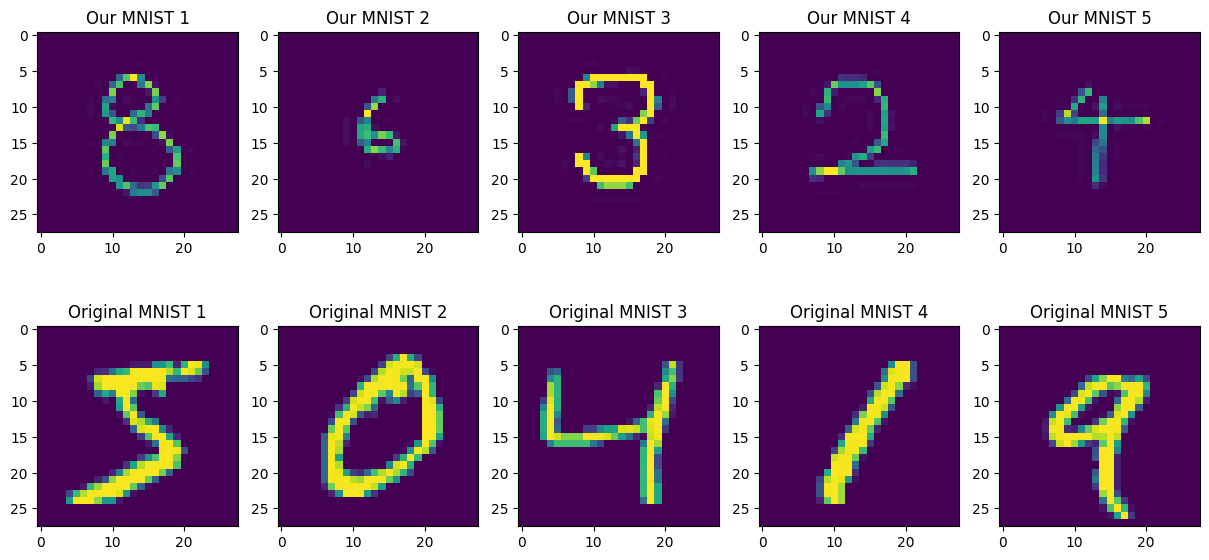

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

plt.figure(figsize=(15, 7))
for i in range(5):
  plt.subplot(2, 5, i + 1)
  plt.imshow(our_train_images[random.randint(0, 389)])
  plt.title(f'Our MNIST {i + 1}')
  plt.subplot(2, 5, i + 6)
  plt.imshow(train_images[i])
  plt.title(f'Original MNIST {i + 1}')
plt.show()

## TODO2: 모델 만들기<br>
자유롭게 하나의 모델을 만들어 MNIST 테스트 데이터셋과 우리의 테스트 데이터셋에서 95% 이상의 정확도를 달성해보세요.<br>

In [6]:
# 모델을 자유롭게 만들어 보세요. (여러 개의 셀 사용 가능)

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

model = models.Sequential()

# 입력 레이어
model.add(layers.Input(shape=(28, 28, 1)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=["accuracy"])


## TODO3: 나만의 훈련 데이터 만들기

6만장의 MNIST 훈련 데이터와 우리가 그린 390장의 훈련 데이터를 잘 가공하여 나만의 훈련 데이터를 만들어 보세요.<br>
단순하게 둘을 이어붙인다면 우리가 그린 390장은 훈련에서 거의 무시되고 6만장의 MNIST 훈련 데이터 위주로 훈련이 일어납니다.


테스트 데이터 혹은 테스트 데이터를 가공한 데이터셋을 훈련 데이터에 포함하면 안됩니다. **실수하기 쉬우니 조심하세요.**<br>

In [8]:
# TODO: 나만의 훈련 데이터를 자유롭게 만들어 보세요. (증강 등을 위해 여러 개의 코드블록을을 자유로이 사용 가능)
# Hint: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html 사용 가능
# 검증 데이터를 사용할 예정이라면 순서도 섞어 주세요.
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

num_aug = 100
num_ours = len(our_train_images)

augmented_our_images = np.empty((num_aug * num_ours, 28, 28, 1))
augmented_our_labels = np.empty((num_aug * num_ours,))

for i in range(num_ours):
    image = our_train_images[i]
    label = our_train_labels[i]
    for j in range(num_aug):
        augmented_our_images[i * num_aug + j] = datagen.random_transform(image)
        augmented_our_labels[i * num_aug + j] = label


(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, -1)

train_labels = train_labels.astype('int')

# 이어붙이기
my_train_images = np.concatenate([train_images, augmented_our_images], axis=0)
my_train_labels = np.concatenate([train_labels, augmented_our_labels], axis=0)

# 순서 섞기
idx = np.random.permutation(len(my_train_images))
my_train_images = my_train_images[idx]
my_train_labels = my_train_labels[idx]


## TODO4: 훈련하기
자유롭게 모델을 훈련하여 MNIST 테스트 데이터셋과 우리의 테스트 데이터셋에서 95% 이상의 정확도를 달성해보세요.<br>
다만 테스트 데이터 혹은 테스트 데이터를 가공한 데이터셋으로 훈련하면 안됩니다. **실수하기 쉬우니 조심하세요.**<br>


In [9]:
# 자유롭게 훈련해 보세요.
from keras.callbacks import EarlyStopping

epochs = 10000
batch_size = 128
es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(my_train_images, my_train_labels, epochs=epochs, batch_size=batch_size, callbacks=es, validation_split=0.2)

Epoch 1/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.6987 - loss: 0.8930 - val_accuracy: 0.9658 - val_loss: 0.1295
Epoch 2/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9481 - loss: 0.1742 - val_accuracy: 0.9824 - val_loss: 0.0708
Epoch 3/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9673 - loss: 0.1107 - val_accuracy: 0.9861 - val_loss: 0.0497
Epoch 4/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9765 - loss: 0.0783 - val_accuracy: 0.9894 - val_loss: 0.0397
Epoch 5/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9791 - loss: 0.0694 - val_accuracy: 0.9910 - val_loss: 0.0304
Epoch 6/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9829 - loss: 0.0569 - val_accuracy: 0.9914 - val_loss: 0.0351
Epoch 7/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9862 - loss: 0.0472 - val_accuracy: 0.9922 - val_loss: 0.0278
Epoch 8/10000
619/619 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9872 - loss:

## TODO5: MNIST 테스트 데이터로 평가하기

In [10]:
# MNIST 테스트 데이터에서 정확도 95% 이상 달성하기
# 코드 실행만 하면 됩니다.

score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.01651410385966301
Test accuracy: 0.994700014591217


## TODO6: 우리가 만든 테스트 데이터로 평가하기

In [11]:
# 우리가 만든 테스트 데이터에서도 정확도 95% 이상 달성하기
# 코드 실행만 하면 됩니다.

score = model.evaluate(our_test_images, our_test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04075825586915016
Test accuracy: 0.9923076629638672


동일한 모델로 TODO5와 TODO6에서 정확도 95% 이상 달성해야 합니다.<br>
실패했다면 TODO2부터 검토하여 다시 도전해 보세요.